# Get values for a single dataset

This notebook shows, how to retrieve data for a single dataset as a pandas dataframe

In [1]:
from  odmfclient import login, APIclient
api = APIclient('https://data.fb09.uni-giessen.de/gbh/').login('odmf.admin', 'Ez8F7UhB65IHqcye0nph').api
help(api)

Help on APIMethod in module odmfclient.apiclient:

<odmfclient.apiclient.APIMethod object>
    A RESTful API for machine to machine communication using json



Get the one dataset at site 1 with valuetype 30

In [2]:
help(api.dataset)

Help on APIMethod in module odmfclient.apiclient:

<odmfclient.apiclient.APIMethod object>
    Provides an REST API to datasets
    
    Usages:
    
    :/api/dataset: Returns a list of existing dataset ids
    :/api/dataset/1: Returns the dataset metadata as json of ds1
    :/api/dataset/new: Creates a new dataset using POST or PUT data.
    :/api/dataset/addrecord: Adds a record to a dataset using PUT data
                             in the form ``{dsid: 1, value:2.0, time:2019-05-03T12:02}``



In [3]:
dsid=1
api.dataset.list(site=1, valuetype=1)

[22, 17, 18, 12, 13, 1, 2, 3]

Get the **metadata** of that dataset

In [3]:
api.dataset(dsid=844)

{'access': 1,
 'comment': None,
 'end': '2022-09-09T09:10:00',
 'filename': 'Agroforst-GH1/ADCON-Data/ADCON-Transects',
 'id': 844,
 'label': 'ds0844: Soil moisture RAW [-] (17) at #1234 -0.6 m offset with TEROS 11 (sensor) (2021-04-01 00:00:00 - 2022-09-09 09:10:00)',
 'level': -0.6,
 'measured_by': {'car_available': 0,
  'comment': 'PostDoc in the HMUKLV Agroforstproject 2021',
  'email': 'Karolina.Golicz@umwelt.uni-giessen.de',
  'firstname': 'Karolina',
  'label': 'Karolina Golicz',
  'mobile': None,
  'supervisor': 'None',
  'surname': 'Golicz',
  'telephone': None,
  'username': 'karolina.golicz'},
 'name': 'Soil moisture-AF-GH1-T3+6-0.6-6',
 'quality': {'comment': 'Raw, unprocessed data', 'id': 0, 'name': 'raw'},
 'site': {'comment': '# Soil moisture sensors\n\nTEROS 11/12 Sensors (METER group) on Transect T3 connected to RTU at #738\n\nOffset: +6 to  #738',
  'height': None,
  'icon': 'soilmoisture.png',
  'id': 1234,
  'lat': 50.39791106833729,
  'lon': 8.25299019641635,
  'na

Load the values from that dataset as a dataframe

<AxesSubplot:xlabel='time'>

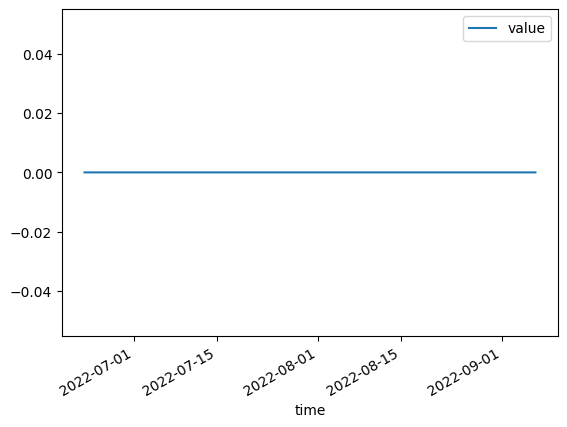

In [11]:
df = api.dataset.values_parquet(dsid=844)
df.index = df['time']
del df['time']
df.plot()

In [13]:
df.max()

value    0.0
dtype: float64

In [14]:
api.client.session.close()